## Library

In [1]:
import os
import math
import dill
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')

exec(open('modules/anchors.py').read())
print('Loaded')

%matplotlib inline

Loaded
Loaded


## Human brain (log FLOP/s)

In [2]:
# https://www.openphilanthropy.org/research/how-much-computational-power-does-it-take-to-match-the-human-brain/
# https://www.metaculus.com/questions/2646/what-will-the-necessary-computational-power-to-replicate-human-mental-capability-turn-out-to-be/
human_brain = sq.mixture([[0.5, sq.lognorm(13, 17, credibility=80)],
                          [0.5, sq.lognorm(13, 24, credibility=80)]])
sq.get_percentiles(human_brain @ 10000, digits=1)

{1: 10.7,
 5: 12.3,
 10: 13.0,
 20: 13.8,
 30: 14.4,
 40: 15.0,
 50: 15.6,
 60: 16.4,
 70: 17.4,
 80: 19.0,
 90: 21.7,
 95: 24.2,
 99: 29.5}

Simple lifetime
{1: 19.6,
 5: 21.2,
 10: 21.9,
 20: 22.8,
 30: 23.5,
 40: 24.0,
 50: 24.6,
 60: 25.3,
 70: 26.2,
 80: 27.6,
 90: 30.4,
 95: 32.8,
 99: 37.6}
-
GPT2 can do it: 7.5%
GPT3 can do it: 30.6%
GPT4 can do it: 59.7%
10x GPT4 can do it: 70.7%
100x GPT4 can do it: 78.0%
1000x GPT4 can do it: 82.8%
-


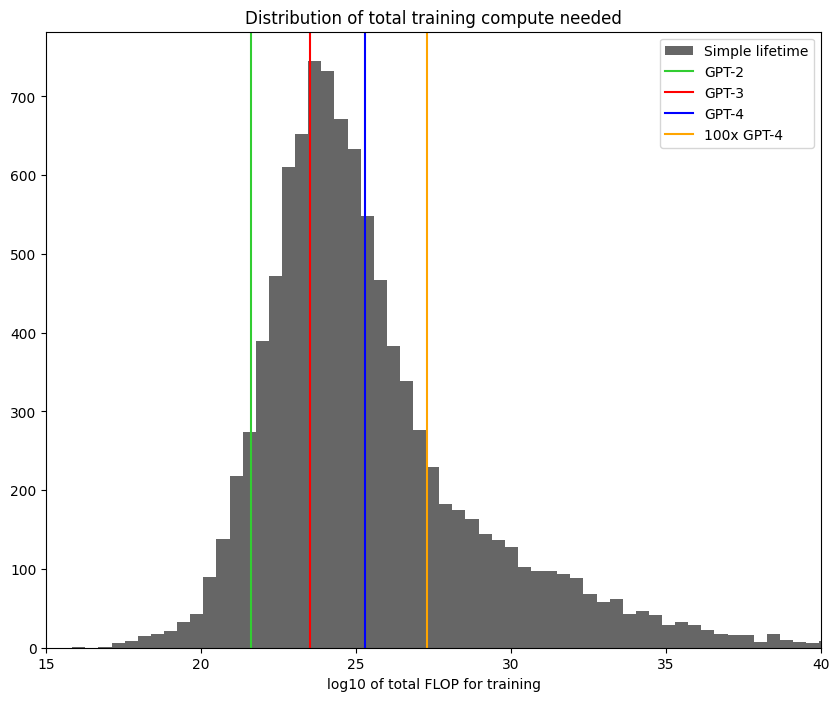

In [3]:
simple_lifetime_anchor = tai_log_flop_needs(brain=human_brain,
                                            horizon_length=np.log10(thirty_years_in_seconds),
                                            ref_params=0,
                                            ref_params_samples=0,
                                            bayes_update=None)

plot_anchors(anchor1=simple_lifetime_anchor @ 10000,
             label1='Simple lifetime',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4',
             disable_ci_lines=True,
             xlim=[15,40])

Simple lifetime
{1: 19.8,
 5: 21.3,
 10: 22.0,
 20: 22.8,
 30: 23.5,
 40: 24.0,
 50: 24.7,
 60: 25.4,
 70: 26.3,
 80: 27.9,
 90: 30.5,
 95: 33.0,
 99: 38.0}
-
GPT2 can do it: 6.9%
GPT3 can do it: 30.5%
GPT4 can do it: 59.2%
10x GPT4 can do it: 70.0%
100x GPT4 can do it: 76.7%
1000x GPT4 can do it: 82.0%
-
Cotra lifetime
{1: 25.4,
 5: 26.3,
 10: 26.7,
 20: 27.3,
 30: 27.6,
 40: 28.1,
 50: 28.5,
 60: 29.0,
 70: 29.9,
 80: 31.3,
 90: 33.9,
 95: 36.4,
 99: 41.1}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 0.8%
10x GPT4 can do it: 5.5%
100x GPT4 can do it: 21.3%
1000x GPT4 can do it: 46.0%
-


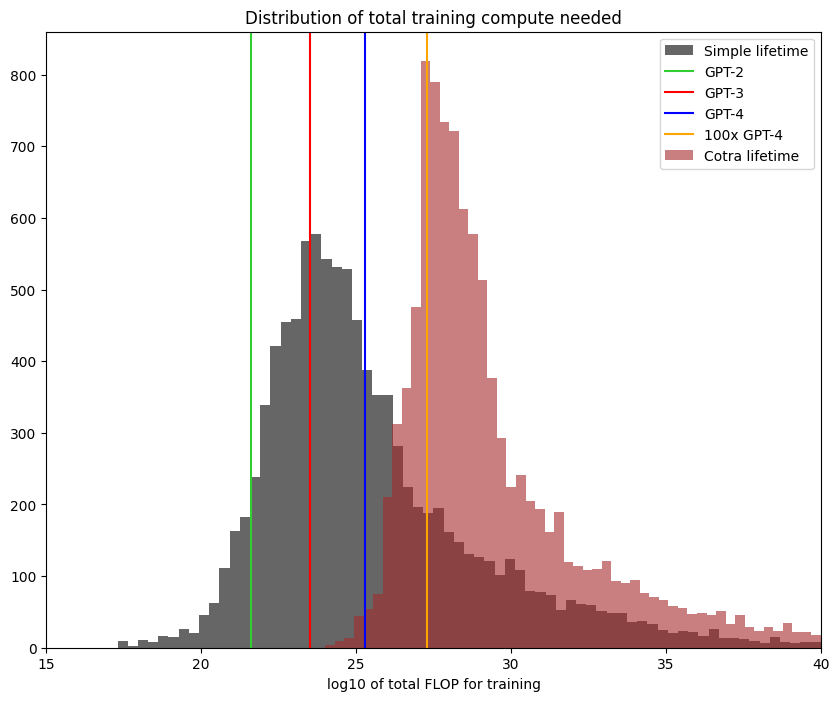

In [4]:
cotra_lifetime_anchor = tai_log_flop_needs(brain=human_brain,
                                           efficiency=sq.lognorm(2,5),
                                           horizon_length=9,
                                           ref_params=0,
                                           ref_params_samples=0,
                                           bayes_update=cotra_bayes_update_against_low_flop)


plot_anchors(anchor1=simple_lifetime_anchor @ 10000,
             label1='Simple lifetime',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4',
             anchor6=cotra_lifetime_anchor @ 10000,
             label6='Cotra lifetime',
             disable_ci_lines=True,
             xlim=[15,40])

## Cotra 2022 anchor

Loading from cache file (`caches/cotra_2022.sqcache.npy`)...
Cache from: 2024-04-26 16:08:38.989981
estimate of Cotra (2022)
{1: 25.3,
 5: 26.7,
 10: 27.4,
 20: 28.6,
 30: 29.9,
 40: 31.5,
 50: 32.9,
 60: 34.5,
 70: 36.2,
 80: 38.4,
 90: 42.3,
 95: 57.3,
 99: 67.2}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 1.0%
10x GPT4 can do it: 3.4%
100x GPT4 can do it: 9.2%
1000x GPT4 can do it: 17.5%
-


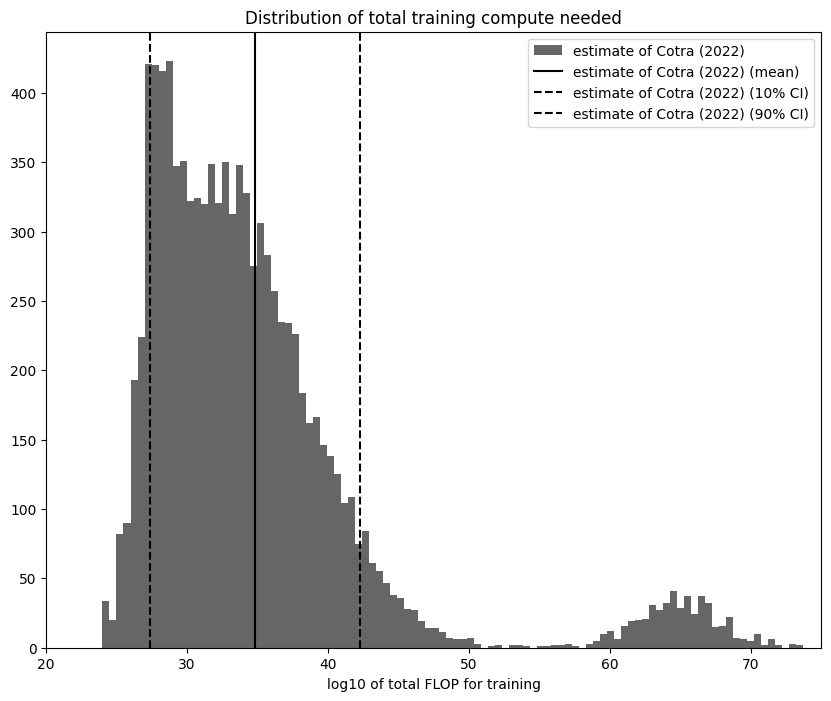

estimate of Cotra 2022
{1: 25.3,
 5: 26.7,
 10: 27.4,
 20: 28.6,
 30: 29.9,
 40: 31.5,
 50: 32.9,
 60: 34.5,
 70: 36.2,
 80: 38.4,
 90: 42.3,
 95: 57.3,
 99: 67.2}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 1.0%
10x GPT4 can do it: 3.4%
100x GPT4 can do it: 9.2%
1000x GPT4 can do it: 17.5%
-


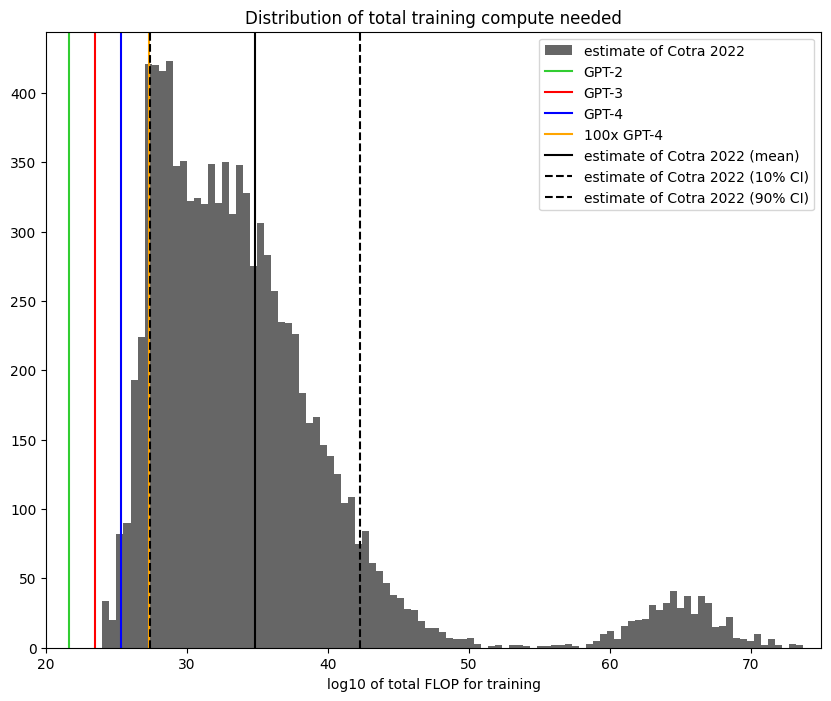

In [5]:
cotra_2022_samples = sq.sample(load_cache_file='caches/cotra_2022', n=10000, verbose=True)
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
plot_anchors(anchor1=cotra_2022_samples, label1='estimate of Cotra (2022)')

plot_anchors(anchor1=cotra_2022_samples,
             label1='estimate of Cotra 2022',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4')

### PASTA

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 2575879.14it/s]

Writing cache to file `caches/pasta.sqcache.npy`...


...Cached
PASTA
{1: 24.2,
 5: 25.4,
 10: 26.1,
 20: 26.9,
 30: 27.8,
 40: 29.2,
 50: 30.9,
 60: 32.6,
 70: 34.6,
 80: 36.8,
 90: 40.2,
 95: 43.1,
 99: 49.7}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 4.4%
10x GPT4 can do it: 12.0%
100x GPT4 can do it: 24.5%
1000x GPT4 can do it: 33.7%
-


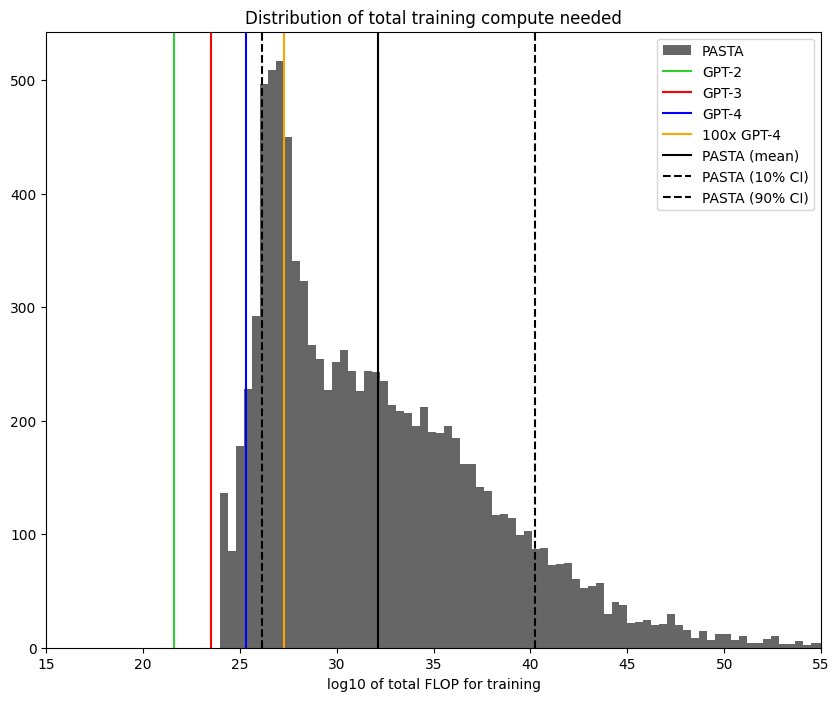

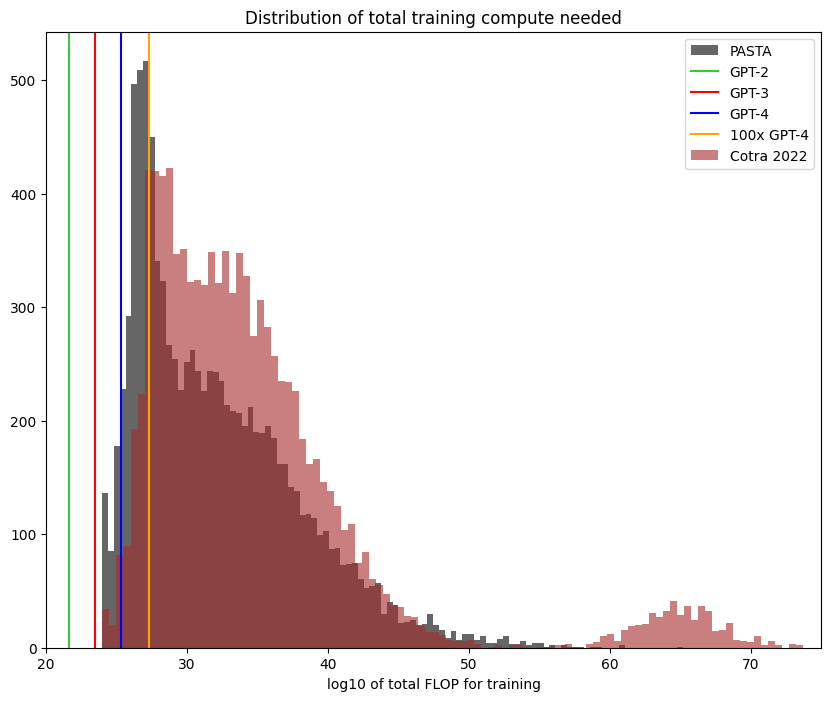

In [6]:
# https://www.lesswrong.com/posts/BGtjG6PzzmPngCgW9/revisiting-the-horizon-length-hypothesis
# what’s your guess for how much compute is needed for Davidson’s “AI that could readily automate 20% of cognitive tasks?” 

pasta_horizon_length = sq.mixture([[0.1, 0],
                                   [0.4, 1],
                                   [0.35, sq.norm(1,3)],
                                   [0.1, sq.lognorm(2,5)],
                                   [0.05, sq.norm(5,10)]], lclip=0)

pasta = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                           efficiency=sq.norm(-2,2),
                           transformative_vs_human=sq.norm(-1,2),
                           horizon_length=pasta_horizon_length,
                           scaling_exponent=sq.norm(0.5,1.5),
                           flops_per_param_per_sec=sq.norm(1,2),
                           bayes_update=peter_bayes_update_against_low_flop)

pasta_samples = sq.sample(pasta, n=10000, verbose=True, dump_cache_file='caches/pasta')
plot_anchors(anchor1=pasta_samples,
             label1='PASTA',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4',
             xlim=[15,55])

plot_anchors(anchor1=pasta_samples,
             label1='PASTA',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4',
             anchor6=cotra_2022_samples,
             label6='Cotra 2022',
             disable_ci_lines=True,
             verbose=False)

In [7]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-12-26 21:08:16.289414
